In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
#import warnings
#warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [10]:
business = pd.read_csv('./../Data/yelp_academic_dataset_business.csv')

In [11]:
business.head(5)

,neighborhood,business_id,hours,is_open,address,attributes,categories,city,review_count,name,longitude,state,stars,latitude,postal_code,type
0,NaN,0DI8Dt2PJp07XkVvIElIcQ,"['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",0,"227 E Baseline Rd, Ste J2","['BikeParking: True', 'BusinessAcceptsBitcoin:...","['Tobacco Shops', 'Nightlife', 'Vape Shops', '...",Tempe,17,Innovative Vapors,-111.936102,AZ,4.5,33.378214,85283,business
1,NaN,LTlCaCGZE14GuaUXUGbamg,"['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",1,495 S Grand Central Pkwy,"['BusinessAcceptsBitcoin: False', 'BusinessAcc...","['Caterers', 'Grocery', 'Food', 'Event Plannin...",Las Vegas,9,Cut and Taste,-115.159272,NV,5.0,36.192284,89106,business
2,Dufferin Grove,EDqCEAGXVGCH4FJXgqtjqg,"['Monday 11:0-2:0', 'Tuesday 11:0-2:0', 'Wedne...",1,979 Bloor Street W,"['Alcohol: none', ""Ambience: {'romantic': Fals...","['Restaurants', 'Pizza', 'Chicken Wings', 'Ita...",Toronto,7,Pizza Pizza,-79.429089,ON,2.5,43.661054,M6H 1L5,business
3,NaN,cnGIivYRLxpF7tBVR_JwWA,"['Tuesday 10:0-21:0', 'Wednesday 10:0-21:0', '...",1,7014 Steubenville Pike,"['AcceptsInsurance: False', 'BusinessAcceptsCr...","['Hair Removal', 'Beauty & Spas', 'Blow Dry/Ou...",Oakdale,4,Plush Salon and Spa,-80.174540,PA,4.0,40.444544,15071,business
4,Downtown Core,cdk-qqJ71q6P7TJTww_DSA,NaN,1,321 Jarvis Street,"['BusinessAcceptsCreditCards: True', 'Restaura...","['Hotels & Travel', 'Event Planning & Services...",Toronto,8,Comfort Inn,-79.375401,ON,3.0,43.659829,M5B 2C2,business


In [12]:
business.columns

Index([u'neighborhood', u'business_id', u'hours', u'is_open', u'address',
       u'attributes', u'categories', u'city', u'review_count', u'name',
       u'longitude', u'state', u'stars', u'latitude', u'postal_code', u'type'],
      dtype='object')

In [13]:
business.shape

(144072, 16)

In [14]:
business.isnull().sum().sort_values(ascending=False)

neighborhood    86163
hours           41608
attributes      16910
address          4234
postal_code       736
categories        325
city                1
type                0
latitude            0
stars               0
state               0
longitude           0
name                0
review_count        0
is_open             0
business_id         0
dtype: int64

Lots of neighborhood, hours, attributes information are missing! 

In [15]:
business.business_id.is_unique #business_id is all unique

True

In [16]:
business.groupby(['city'])['business_id'].agg('count').sort_values(ascending=False).shape

(877,)

In [17]:
business[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars
5966,Mon Ami Gabi,6414,Las Vegas,4.0
4928,Bacchanal Buffet,5715,Las Vegas,4.0
83176,Wicked Spoon,5216,Las Vegas,3.5
70469,Gordon Ramsay BurGR,5116,Las Vegas,4.0
123061,Earl of Sandwich,4655,Las Vegas,4.5
34945,Gangnam Asian BBQ Dining,4120,Las Vegas,4.5
90359,Serendipity 3,3911,Las Vegas,3.0
90174,Hash House A Go Go,3881,Las Vegas,4.0
73397,The Buffet,3676,Las Vegas,3.5
123062,The Buffet at Bellagio,3481,Las Vegas,3.5


In [18]:
city_business_counts = business[['city', 'business_id']].groupby(['city'])['business_id'].agg('count').sort_values(ascending=False)

In [19]:
city_business_counts = pd.DataFrame(data=city_business_counts)

In [20]:
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

In [21]:
city_business_counts.head(10)

,number_of_businesses
city,
Las Vegas,22892
Toronto,14540
Phoenix,14468
Scottsdale,6917
Charlotte,6912
Pittsburgh,5275
Montréal,4785
Mesa,4714
Henderson,3788


In [22]:
import numpy as np

In [23]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8') #This is needed otherwise u'Montréal' caused issues!

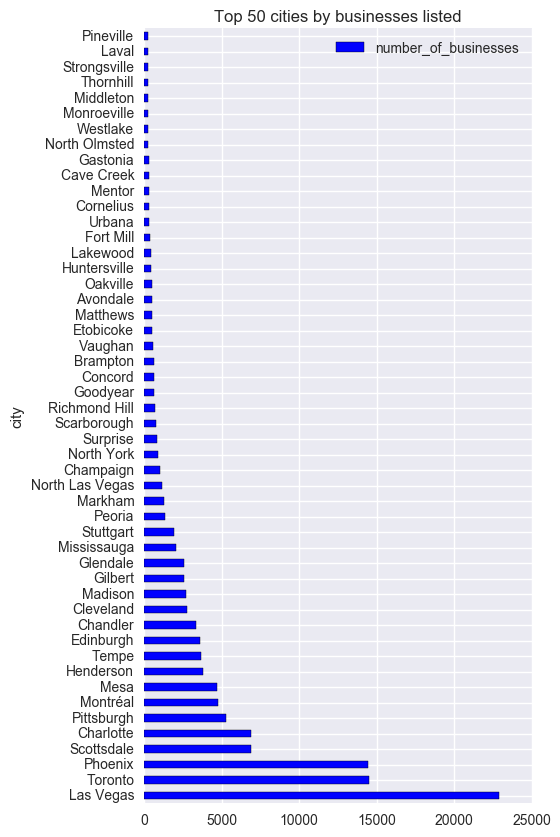

In [24]:
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses").plot(kind='barh', stacked=False, figsize=[5,10], colormap='winter')
plt.title('Top 50 cities by businesses listed')

Most of the businesses listed are in major North American cities likes Las Vegas, Toronto, and Phoenix! 

In [25]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

,review_count,stars
city,,
Las Vegas,1295478,3.698432
Phoenix,456673,3.672380
Toronto,349695,3.515750
Scottsdale,245105,3.929666
Charlotte,183463,3.570674
Pittsburgh,143116,3.650047
Tempe,129786,3.700108
Henderson,126750,3.757524
Mesa,97842,3.619538


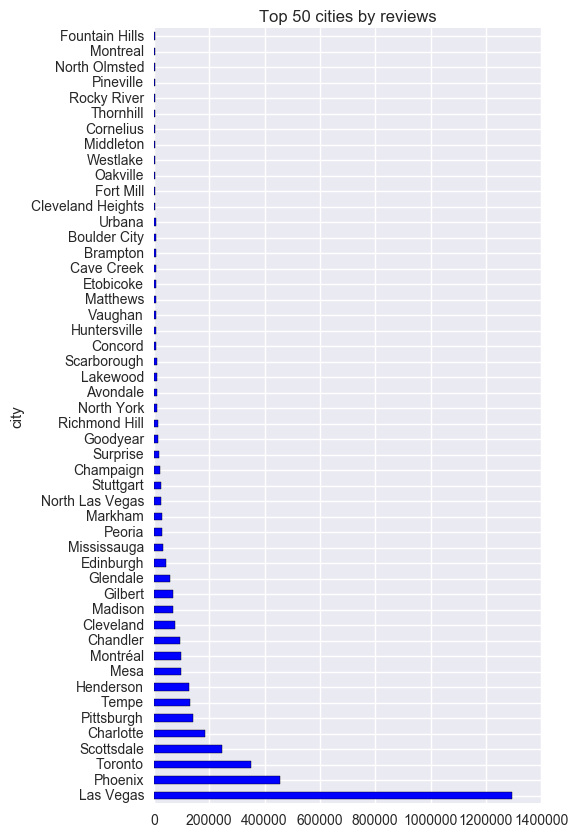

In [26]:
city_business_reviews['review_count'][0:50].plot(kind='barh', stacked=False, figsize=[5,10], colormap='winter')
plt.title('Top 50 cities by reviews')

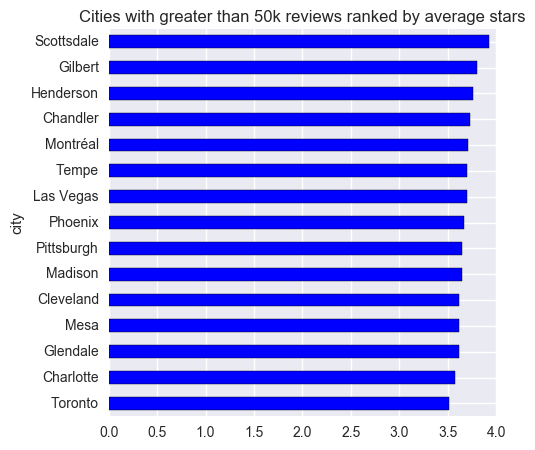

In [27]:
city_business_reviews[city_business_reviews.review_count > 50000]['stars'].sort_values().plot(kind='barh', stacked=False, figsize=[5,5], colormap='winter')
plt.title('Cities with greater than 50k reviews ranked by average stars')

In [28]:
business['stars'].value_counts()

4.0    29481
3.5    26753
5.0    21041
3.0    20541
4.5    20387
2.5    12594
2.0     7577
1.5     3252
1.0     2446
Name: stars, dtype: int64

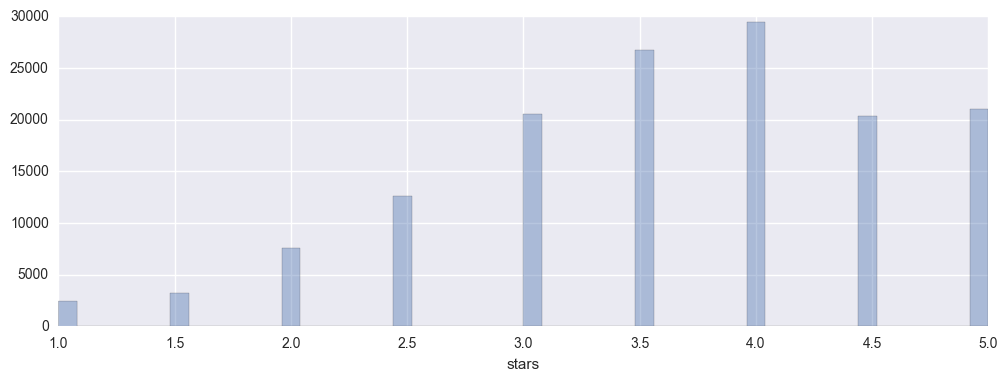

In [29]:
sns.distplot(business.stars, kde=False)

In [30]:
business['is_open'].value_counts()

1    122505
0     21567
Name: is_open, dtype: int64

In [31]:
tip = pd.read_csv('./../Data/yelp_academic_dataset_tip.csv')

In [32]:
tip.head(10)

,user_id,text,business_id,likes,date,type
0,zcTZk7OG8ovAmh_fenH21g,Get here early enough to have dinner.,tJRDll5yqpZwehenzE2cSg,0,2012-07-15,tip
1,ZcLKXikTHYOnYt5VYRO5sg,Great breakfast large portions and friendly wa...,jH19V2I9fIslnNhDzPmdkA,0,2015-08-12,tip
2,oaYhjqBbh18ZhU0bpyzSuw,Nice place. Great staff. A fixture in the tow...,dAa0hB2yrnHzVmsCkN4YvQ,0,2014-06-20,tip
3,ulQ8Nyj7jCUR8M83SUMoRQ,Happy hour 5-7 Monday - Friday,dAa0hB2yrnHzVmsCkN4YvQ,0,2016-10-12,tip
4,ulQ8Nyj7jCUR8M83SUMoRQ,Come early on Sunday's to avoid the rush,SqW3igh1_Png336VIb5DUA,0,2016-07-03,tip
5,ulQ8Nyj7jCUR8M83SUMoRQ,Love their soup!,KNpcPGqDORDdvtekXd348w,0,2016-01-07,tip
6,ulQ8Nyj7jCUR8M83SUMoRQ,Soups are fantastic!,KNpcPGqDORDdvtekXd348w,0,2016-05-22,tip
7,ulQ8Nyj7jCUR8M83SUMoRQ,Thursday night is $5 burger night,KNpcPGqDORDdvtekXd348w,0,2016-06-09,tip
8,ulQ8Nyj7jCUR8M83SUMoRQ,"Very good for lunch, bread and soup are excellent",8qNOI6Q1-rJrvWWD5Btz6w,0,2016-06-01,tip
9,ulQ8Nyj7jCUR8M83SUMoRQ,Tuesday spaghetti special all day $5.59 inclu...,8qNOI6Q1-rJrvWWD5Btz6w,0,2016-06-14,tip


In [33]:
tip.shape

(946600, 6)

#How many of the selected words are used in the user tips?

In [34]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']

In [35]:
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
selected_word_count = vectorizer.fit_transform(tip['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [37]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(946600, 11)

In [38]:
word_count_array.sum(axis=0)

array([19034, 62239,  4284, 21394, 23115,  2707,  8654,  2119,  1054,
         764,  1107])

In [39]:
temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

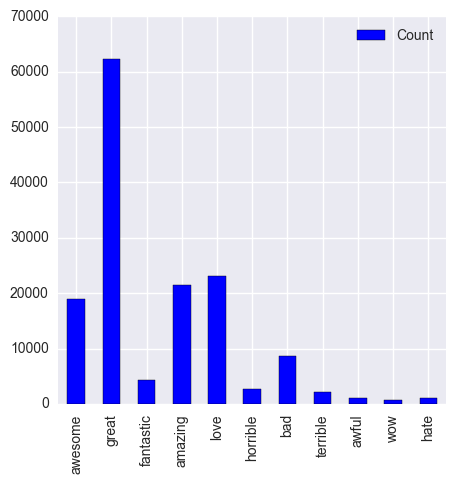

In [40]:
temp.plot(kind='bar', stacked=False, figsize=[5,5], colormap='winter')

We see that most of the tips are positive rather than negative!

#Lets look at one restaurant with high star rating and one with low star rating and see what the user tips look like

#Lets look at Earl of Sandwich	 restaurant in Las Vegas which has 4.5 rating

In [41]:
business[business.name=='Earl of Sandwich']

,neighborhood,business_id,hours,is_open,address,attributes,categories,city,review_count,name,longitude,state,stars,latitude,postal_code,type
21215,NaN,Ffhe2cmRyloz3CCdRGvHtA,"['Monday 6:0-0:0', 'Tuesday 6:0-0:0', 'Wednesd...",1,"Palms Casino Resort, 4321 W. Flamingo Rd","['Alcohol: beer_and_wine', ""Ambience: {'romant...","['Event Planning & Services', 'Food', 'Caterer...",Las Vegas,204,Earl of Sandwich,-115.195589,NV,4.0,36.114345,89103,business
61741,South Summerlin,EyrF5YU1sjWXsxTSosHqMQ,"['Monday 8:0-21:0', 'Tuesday 8:0-21:0', 'Wedne...",1,"2010 Festival Plaza Dr, Ste 180","['Alcohol: none', ""Ambience: {'romantic': Fals...","['Restaurants', 'Salad', 'Sandwiches', 'Breakf...",Las Vegas,79,Earl of Sandwich,-115.333075,NV,4.0,36.149008,89103,business
61831,The Strip,fE7x3Ui2mzdwdfJnd7r_1g,"['Monday 11:0-23:0', 'Tuesday 11:0-23:0', 'Wed...",1,3570 Las Vegas Blvd S,"['Alcohol: beer_and_wine', 'BikeParking: False...","['Restaurants', 'Coffee & Tea', 'Food', 'Cater...",Las Vegas,103,Earl of Sandwich,-115.175836,NV,3.0,36.117724,89109,business
123061,The Strip,DkYS3arLOhA8si5uUEmHOw,"['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...",1,3667 Las Vegas Blvd S,"['Alcohol: beer_and_wine', ""Ambience: {'romant...","['Restaurants', 'Caterers', 'Event Planning & ...",Las Vegas,4655,Earl of Sandwich,-115.171877,NV,4.5,36.109361,89109,business
132483,South Summerlin,3fT1kcQ-MVEImGHa3hll5w,"['Monday 10:0-21:0', 'Tuesday 10:0-21:0', 'Wed...",1,"Downtown Summerlin, 2010 Festival Plaza Dr. St...","['GoodForKids: True', 'RestaurantsReservations...","['Caterers', 'Event Planning & Services', 'Res...",Las Vegas,3,Earl of Sandwich,-115.333188,NV,3.5,36.149159,89103,business


Since there are multiple, lets pick by index

In [42]:
business.loc[123061,:]

neighborhood                                            The Strip
business_id                                DkYS3arLOhA8si5uUEmHOw
hours           ['Monday 0:0-0:0', 'Tuesday 0:0-0:0', 'Wednesd...
is_open                                                         1
address                                     3667 Las Vegas Blvd S
attributes      ['Alcohol: beer_and_wine', "Ambience: {'romant...
categories      ['Restaurants', 'Caterers', 'Event Planning & ...
city                                                    Las Vegas
review_count                                                 4655
name                                             Earl of Sandwich
longitude                                                -115.172
state                                                          NV
stars                                                         4.5
latitude                                                  36.1094
postal_code                                                 89109
type      

In [43]:
earl_of_sandwich = tip[tip.business_id==business.loc[123061,:].business_id]

In [44]:
earl_of_sandwich_selected_word_count = vectorizer.fit_transform(earl_of_sandwich['text'].values.astype('U'))

In [45]:
word_count_array = earl_of_sandwich_selected_word_count.toarray()
temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
temp

,Count
awesome,13
great,30
fantastic,1
amazing,20
love,30
horrible,0
bad,8
terrible,1
awful,0
wow,1


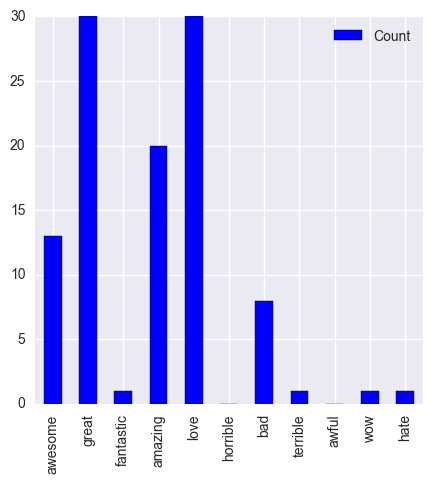

In [46]:
temp.plot(kind='bar', stacked=False, figsize=[5,5], colormap='winter')

We can see that the tips are mostly positive!

In [47]:
business[['name', 'review_count', 'city', 'stars']][business.review_count>1000].sort_values(ascending=True, by="stars")[0:5]

,name,review_count,city,stars
76236,Flamingo Las Vegas Hotel & Casino,2498,Las Vegas,2.5
141134,Luxor Hotel and Casino Las Vegas,3166,Las Vegas,2.5
79772,Circus Circus Las Vegas Hotel and Casino,1740,Las Vegas,2.5
53150,The LINQ Hotel & Casino,1057,Las Vegas,2.5
82070,Harrah's Las Vegas Hotel & Casino,1191,Las Vegas,2.5


#Lets look into Luxor Hotel and Casino Las Vegas which has a 2.5 star

In [48]:
luxor_hotel = tip[tip.business_id==business.loc[141134,:].business_id]

In [49]:
luxor_hotel_selected_word_count = vectorizer.fit_transform(luxor_hotel['text'].values.astype('U'))

In [50]:
word_count_array = luxor_hotel_selected_word_count.toarray()
temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

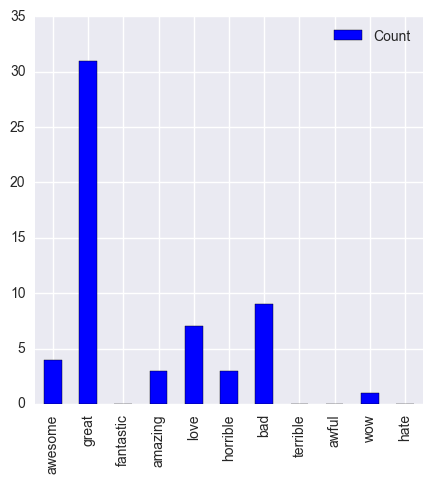

In [51]:
temp.plot(kind='bar', stacked=False, figsize=[5,5], colormap='winter')

This has more positive words than negative, so the user tips for this restaurant are not very predictive of its star! This might make sense because while users write good and bad reviews, tips are naturally like to be what they liked and therefore positive!

#Lets look into user reviews 

In [52]:
reviews = pd.read_csv('./../Data/yelp_academic_dataset_review.csv')

In [53]:
reviews.shape, tip.shape #there are 4.15 million reviews! 

((4153150, 10), (946600, 6))

In [54]:
reviews.head(5)

,funny,user_id,review_id,text,business_id,stars,date,useful,type,cool
0,0,KpkOkG6RIf4Ra25Lhhxf1A,NxL8SIC5yqOdnlXCg18IBg,If you enjoy service by someone who is as comp...,2aFiy99vNLklCx3T_tGS9A,5,2011-10-10,0,review,0
1,0,bQ7fQq1otn9hKX-gXRsrgA,pXbbIgOXvLuTi_SPs1hQEQ,After being on the phone with Verizon Wireless...,2aFiy99vNLklCx3T_tGS9A,5,2010-12-29,1,review,0
2,0,r1NUhdNmL6yU9Bn-Yx6FTw,wslW2Lu4NYylb1jEapAGsw,Great service! Corey is very service oriented....,2aFiy99vNLklCx3T_tGS9A,5,2011-04-29,0,review,0
3,0,aW3ix1KNZAvoM8q-WghA3Q,GP6YEearUWrzPtQYSF1vVg,Highly recommended. Went in yesterday looking ...,2LfIuF3_sX6uwe-IR-P0jQ,5,2014-07-14,0,review,1
4,0,YOo-Cip8HqvKp_p9nEGphw,25RlYGq2s5qShi-pn3ufVA,I walked in here looking for a specific piece ...,2LfIuF3_sX6uwe-IR-P0jQ,4,2014-01-15,0,review,0


#How many of these restaurants serve Japanese food? Lets find out based on reviews!

In [55]:
selected_words = ['sushi', 'miso', 'teriyaki', 'tempura', 'udon', 'soba', 'ramen', 'yakitori', 'izakaya']

#Lets take subset of reviews since there are so many

In [57]:
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=True)

selected_word_count = vectorizer.fit_transform(reviews.loc[0:1000000, 'text'].values.astype('U'))
vectorizer.get_feature_names()

['sushi',
 'miso',
 'teriyaki',
 'tempura',
 'udon',
 'soba',
 'ramen',
 'yakitori',
 'izakaya']

In [58]:
selected_word_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
temp = pd.DataFrame(index=vectorizer.get_feature_names(), data=selected_word_count.toarray().sum(axis=0)).rename(columns={0: 'Count'})
temp

,Count
sushi,59164
miso,4639
teriyaki,4235
tempura,6296
udon,1874
soba,873
ramen,8113
yakitori,275
izakaya,551


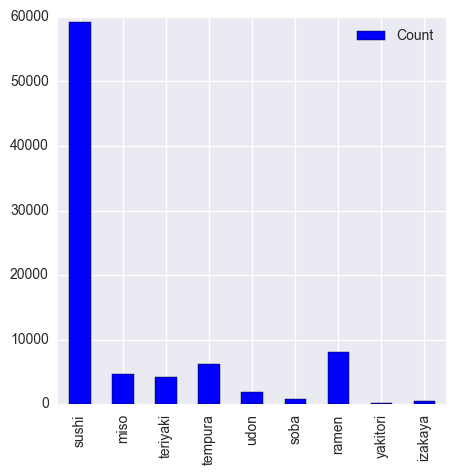

In [60]:
temp.plot(kind='bar', stacked=False, figsize=[5,5], colormap='winter')

Nice! Looks like there are a few Japanese restaurants! Lets find out what they are!

In [61]:
selected_word_count.toarray().shape

(1000001, 9)

In [83]:
selected_word_count.toarray()[0:100].sum(axis=1).shape #sum across words for different reviews

(100,)

In [84]:
japanese_wc = selected_word_count.toarray()
japanese_wc.shape

(1000001, 9)

Lets select only those with at least 5 mentions of the words which seems a bit low but ...

In [122]:
japanese_wc[japanese_wc.sum(axis=1)>5]

array([[ 5,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       ..., 
       [12,  0,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  0, ...,  0,  0,  0]])

In [123]:
np.where(japanese_wc.sum(axis=1)>5)[0]

array([  1340,   1368,   3398, ..., 995974, 996542, 996610])

In [124]:
japanese_biz_id = reviews.loc[np.where(japanese_wc.sum(axis=1)>5)[0], 'business_id'].unique()

In [126]:
business[business.business_id.isin(japanese_biz_id)][['name', 'city', 'stars']]

,name,city,stars
162,Shinano Sushi Bar & Japanese Cuisine,Solon,4.0
164,Yogi's Grill,Phoenix,4.0
537,Koi Sushi Bar & Grill,Peoria,3.0
803,Sushi Xtra,Toronto,3.0
822,Sushi Garden,Toronto,3.0
1158,O-Ku Sushi,Charlotte,4.0
1193,The Signature Kitchen,Toronto,4.0
1682,Nobuya,Toronto,4.5
2491,TJ Hibachi & Sushi Bar,North Olmsted,3.0
3025,Ame,Toronto,3.5


We have found a good number of Japanese restaurants and after going through the list looks like they are all true positives!